
NSL_KDD 主程式
python 3.5
Author:daniel-code
Date:2018.04.11


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time


          0     4      5   6   7   8   9   10  11  12 ...   32    33    34  \
0          0   491      0   0   0   0   0   0   0   0 ...   25  0.17  0.03   
1          0   146      0   0   0   0   0   0   0   0 ...    1  0.00  0.60   
2          0     0      0   0   0   0   0   0   0   0 ...   26  0.10  0.05   
3          0   232   8153   0   0   0   0   0   1   0 ...  255  1.00  0.00   
4          0   199    420   0   0   0   0   0   1   0 ...  255  1.00  0.00   
5          0     0      0   0   0   0   0   0   0   0 ...   19  0.07  0.07   
6          0     0      0   0   0   0   0   0   0   0 ...    9  0.04  0.05   
7          0     0      0   0   0   0   0   0   0   0 ...   15  0.06  0.07   
8          0     0      0   0   0   0   0   0   0   0 ...   23  0.09  0.05   
9          0     0      0   0   0   0   0   0   0   0 ...   13  0.05  0.06   
10         0     0      0   0   0   0   0   0   0   0 ...   12  0.05  0.07   
11         0     0      0   0   0   0   0   0   0   0 ...   13  

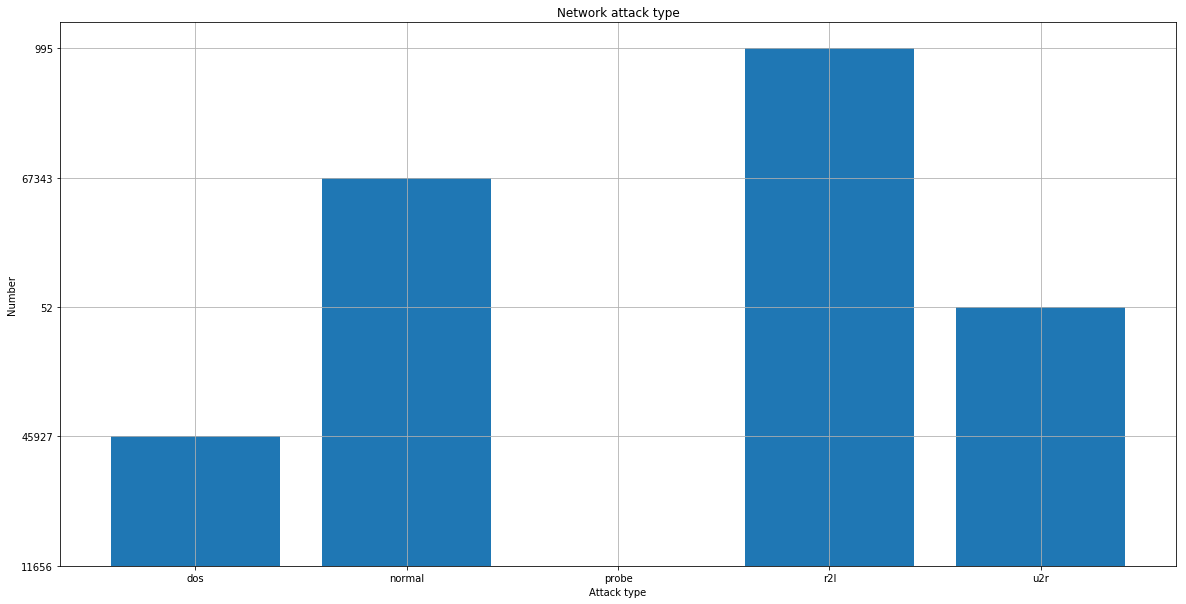

In [3]:
# read kdd date from csv


data = pd.read_csv('NSL_KDD/KDDTrain+.csv', header=None)

# build attack table
attack_type = pd.read_csv('NSL_KDD/Attack Types.csv', names=['attack', 'type'])
attack_type_dict = attack_type.set_index('attack')['type'].to_dict()

# build training data and label
y = data[41].apply(lambda x: attack_type_dict[x])
x = data.drop(columns=[1, 2, 3, 41])
print(x)
# statistics attack type
hist = {}
for row in y.values:
    if row in hist:
        hist[row] += 1
    else:
        hist[row] = 1
sorted_hist_list = np.array(sorted(hist.items(), key=operator.itemgetter(1), reverse=True))
print('Network attack type')
for item in sorted_hist_list:
    print(item[0], '\t', item[1])
print('\nTotal\t', len(x))
plt.figure(figsize=(20, 10))
plt.title('Network attack type')
plt.bar(sorted_hist_list[:, 0], sorted_hist_list[:, 1])
plt.xlabel('Attack type')
plt.ylabel('Number')
plt.grid(True)
plt.show()

In [4]:
x = np.array(x)
y = np.array(y)
# splite dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(x[:, 4:], y, test_size=0.2, random_state=0)

In [5]:
# build model
model = svm.SVC()
print('---START TRAINING---')
start_time = time.time()
model.fit(X=x_train, y=y_train)
print('---END TRAIN---')
print('Time = ', time.time() - start_time)

---START TRAINING---


---END TRAIN---
('Time = ', 3447.6023440361023)


In [7]:
# predict
predict=model.predict(x_test)
score = model.score(X=x_test, y=y_test)
print(score)
print(predict)

0.988370708474
['normal' 'normal' 'normal' ..., 'probe' 'dos' 'normal']


In [10]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

        dos       0.99      0.99      0.99      9166
     normal       0.99      0.99      0.99     13457
      probe       0.97      0.96      0.97      2342
        r2l       0.93      0.92      0.93       215
        u2r       1.00      0.33      0.50        15

avg / total       0.99      0.99      0.99     25195

